In [3]:
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

In [4]:
df = pd.read_csv(r"D:\Deep Learning\diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target variable
features = df.drop('Outcome', axis=1)
target = df['Outcome']

In [6]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler to the features and transform
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

In [7]:
# Add the target variable back to the scaled DataFrame
scaled_df['Outcome'] = target

# Now scaled_df contains the scaled features and the original target variable

scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,1
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207154,-0.766866,-0.666667,0
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,1
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,0
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,1


In [8]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


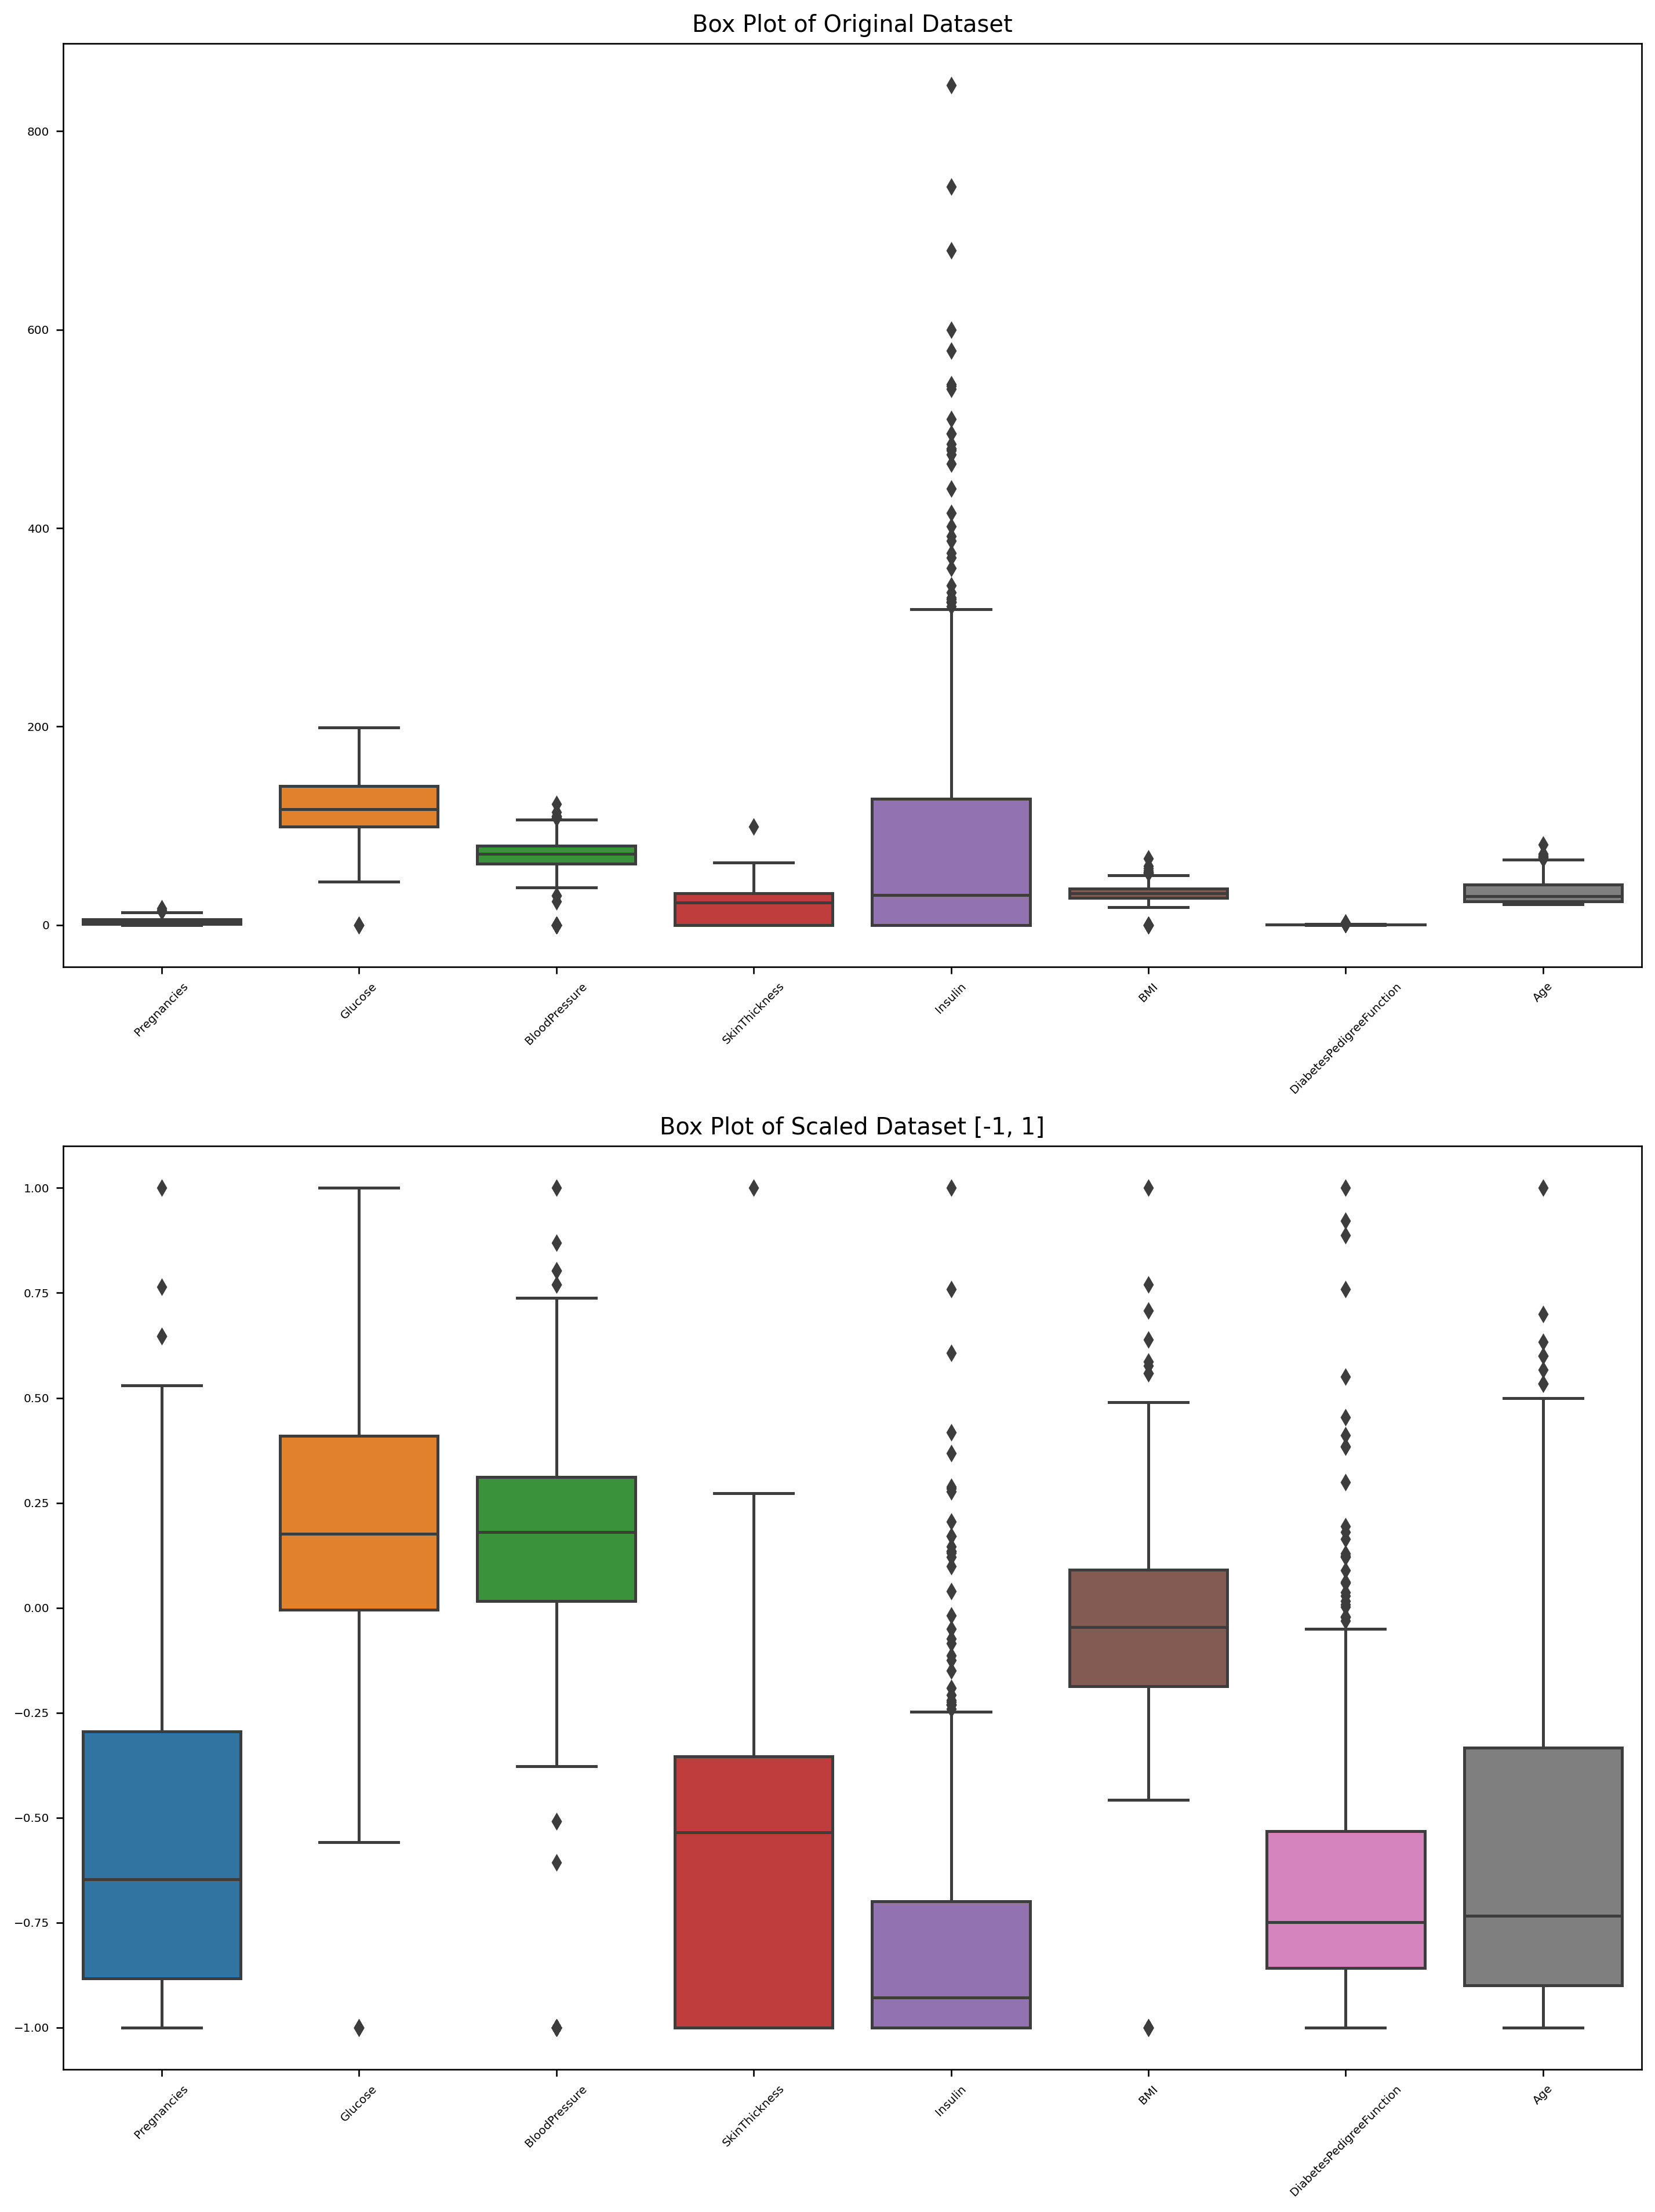

In [9]:
# Separate features and target variable
features = df.drop('Outcome', axis=1)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Box plot for original dataset
sns.boxplot(data=features, ax=ax1)
ax1.set_title('Box Plot of Original Dataset')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Scale the dataset to [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Box plot for scaled dataset
sns.boxplot(data=scaled_df, ax=ax2)
ax2.set_title('Box Plot of Scaled Dataset [-1, 1]')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [10]:
from scipy import stats

# Assuming you've already created scaled_df
z_scores = stats.zscore(scaled_df)
outliers = (abs(z_scores) > 3).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")

# Remove outliers
non_outliers = ~outliers
cleaned_df = scaled_df[non_outliers]

print(f"Original dataset shape: {scaled_df.shape}")
print(f"Cleaned dataset shape: {cleaned_df.shape}")

Number of outliers: 80
Original dataset shape: (768, 8)
Cleaned dataset shape: (688, 8)


In [11]:
from sklearn.model_selection import train_test_split

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step_function(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step_function(linear_output)

    def step_function(self, x):
        return np.where(x >= 0, 1, 0)

# Prepare the data
X = cleaned_df.iloc[:, :-1].values  # All columns except the last one
y = cleaned_df.iloc[:, -1].values   # The last column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the perceptron
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.0072


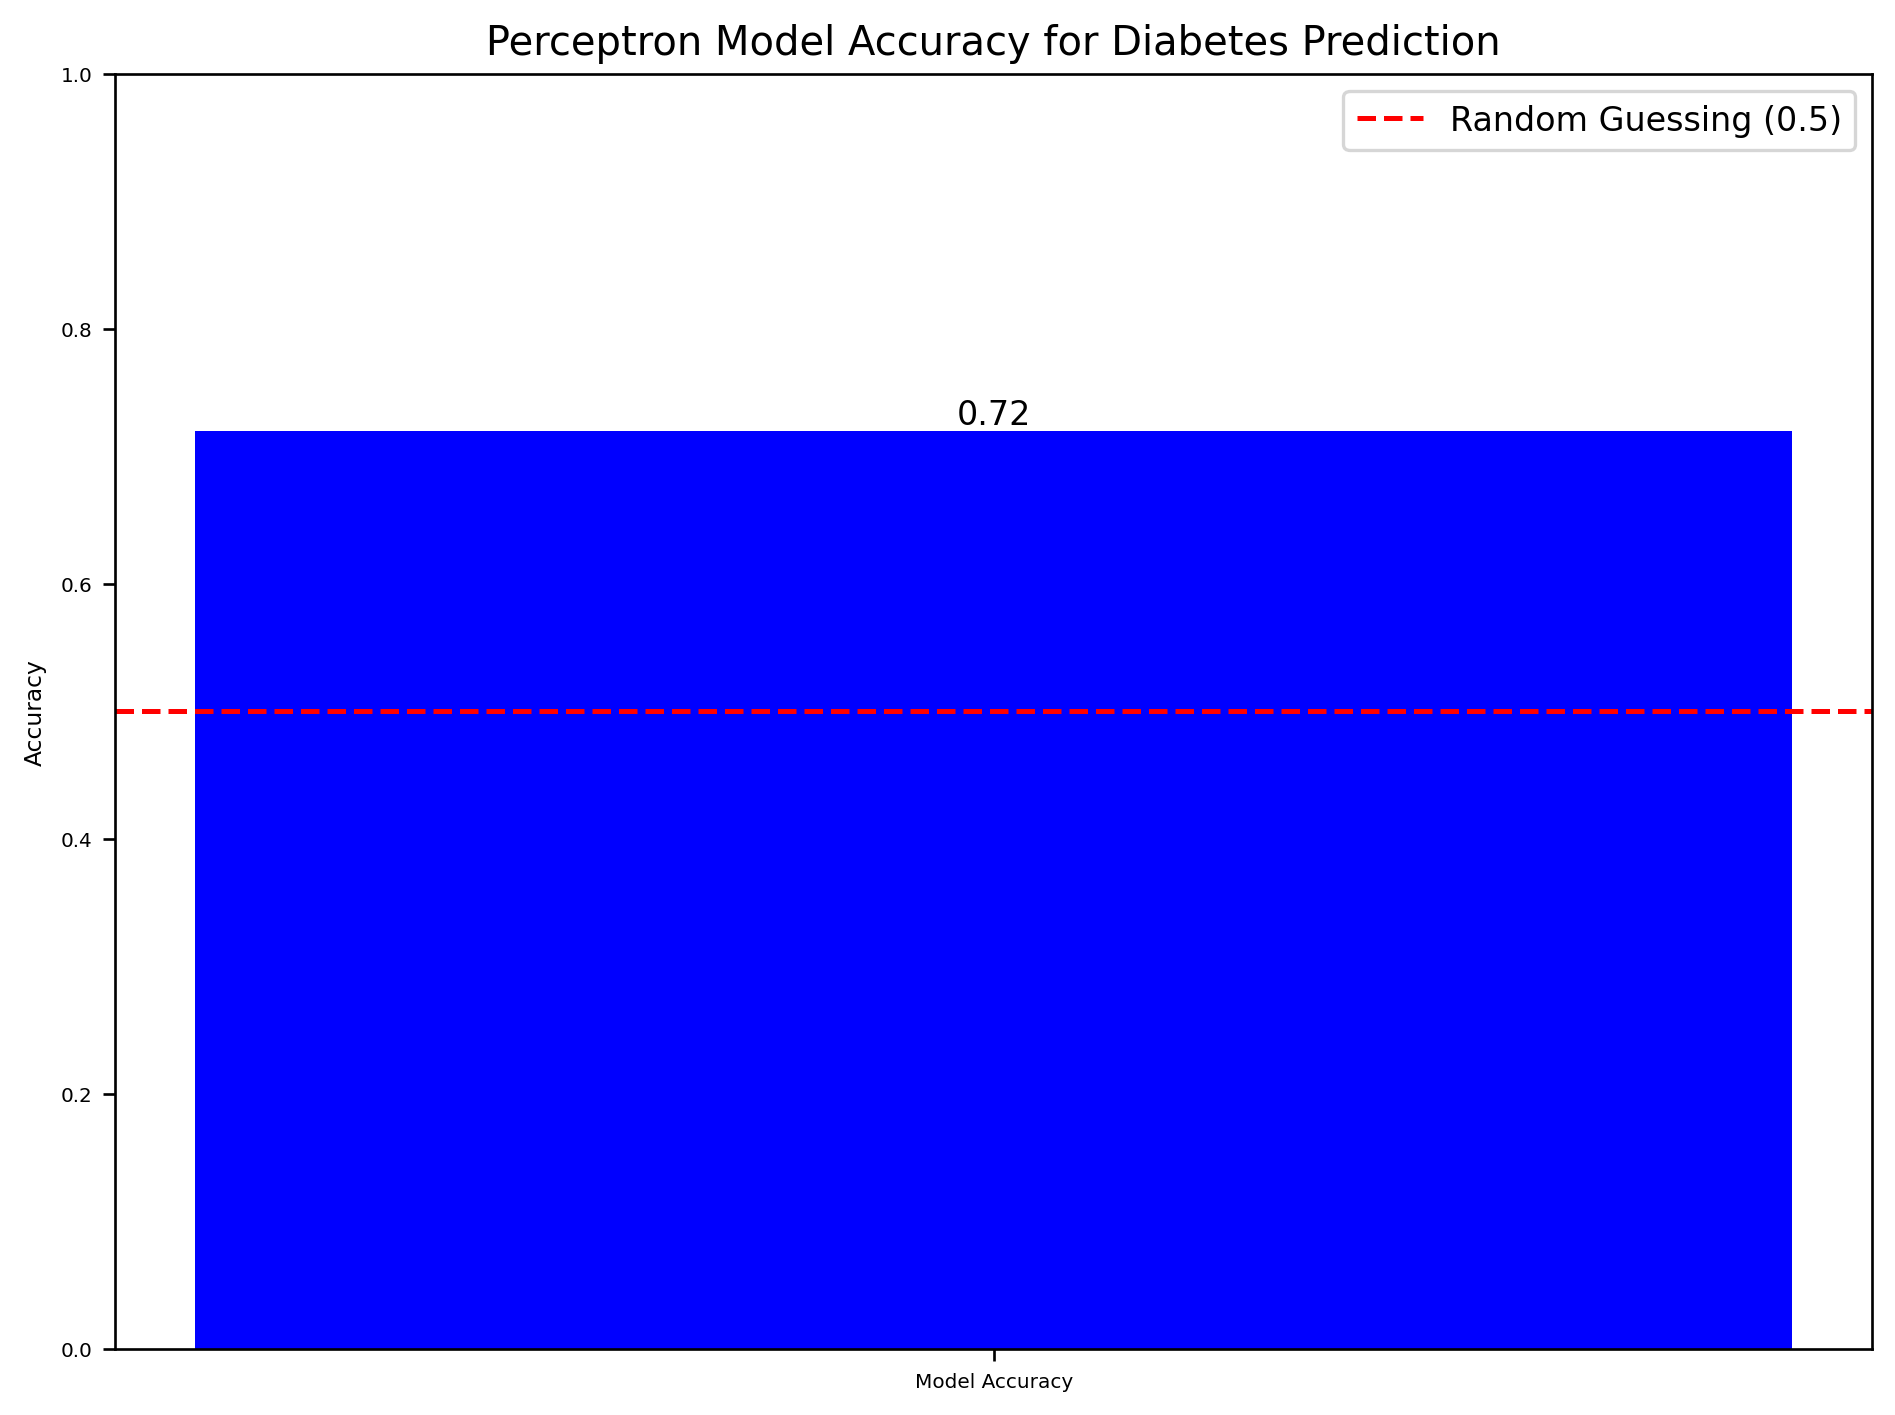

In [18]:
import matplotlib.pyplot as plt

# Accuracy value (you should replace this with your actual model accuracy)
accuracy = 0.72  # This is the accuracy you provided earlier

# Create the bar graph
plt.figure(figsize=(8, 6))
plt.bar(['Model Accuracy'], [accuracy], color='blue')

# Customize the graph
plt.title('Perceptron Model Accuracy for Diabetes Prediction')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Add value label on top of the bar
plt.text(0, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

# Add a horizontal line at 0.5 to represent random guessing
plt.axhline(y=0.5, color='red', linestyle='--', label='Random Guessing (0.5)')
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()

In [ ]:
# Calculate precision, recall, and F1-score
true_positives = np.sum((y_pred == 1) & (y_test == 1))
false_positives = np.sum((y_pred == 1) & (y_test == 0))
false_negatives = np.sum((y_pred == 0) & (y_test == 1))

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")